# Prediction

## Load data

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import proplot as pplt

warnings.filterwarnings('ignore')

df = pd.read_csv("../data/fakedata.csv", skipinitialspace=True)

In [42]:
df.head(24)

id  typeofday  day  hour  temperature  client
0    0          2    1     0     6.900000      36
1    1          2    1     1     7.483333      61
2    2          2    1     2     8.066667      48
3    3          2    1     3     8.650000      54
4    4          2    1     4     9.233333      63
5    5          2    1     5     9.816667      57
6    6          2    1     6    10.400000      45
7    7          2    1     7    10.983333      56
8    8          2    1     8    11.566667      63
9    9          2    1     9    12.150000      49
10  10          2    1    10    12.733333      59
11  11          2    1    11    13.316667      93
12  12          2    1    12    13.316667     100
13  13          2    1    13    12.733333     104
14  14          2    1    14    12.150000     103
15  15          2    1    15    11.566667      57
16  16          2    1    16    10.983333      61
17  17          2    1    17    10.400000      45
18  18          2    1    18     9.816667      98
19  19          2    1    19     9.233333     106
20  20          2    1    20     8.650000     105
21  21          2    1    21     8.066667      98
22  22          2    1    22     7.483333      93
23  23          2    1    23     6.900000      32

In [43]:
df.shape

(24442, 6)

In [44]:
df = df.drop('id', axis ='columns')
df.head()

typeofday  day  hour  temperature  client
0          2    1     0     6.900000      36
1          2    1     1     7.483333      61
2          2    1     2     8.066667      48
3          2    1     3     8.650000      54
4          2    1     4     9.233333      63

## Data information

In [45]:
from sklearn.model_selection import train_test_split

df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24442 entries, 0 to 24441
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   typeofday    24442 non-null  int64  
 1   day          24442 non-null  int64  
 2   hour         24442 non-null  int64  
 3   temperature  24442 non-null  float64
 4   client       24442 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 954.9 KB


(          typeofday           day          hour   temperature        client
 count  24442.000000  24442.000000  24442.000000  24442.000000  24442.000000
 mean       0.321659      2.998691     11.515424     12.572956     50.300589
 std        0.534138      2.000204      6.927508      9.943218     27.714710
 min        0.000000      0.000000      0.000000     -7.400000      0.000000
 25%        0.000000      1.000000      6.000000      4.233333     29.000000
 50%        0.000000      3.000000     12.000000     12.350000     47.000000
 75%        1.000000      5.000000     18.000000     21.033333     72.000000
 max        2.000000      6.000000     24.000000     33.200000    139.000000,
 None)

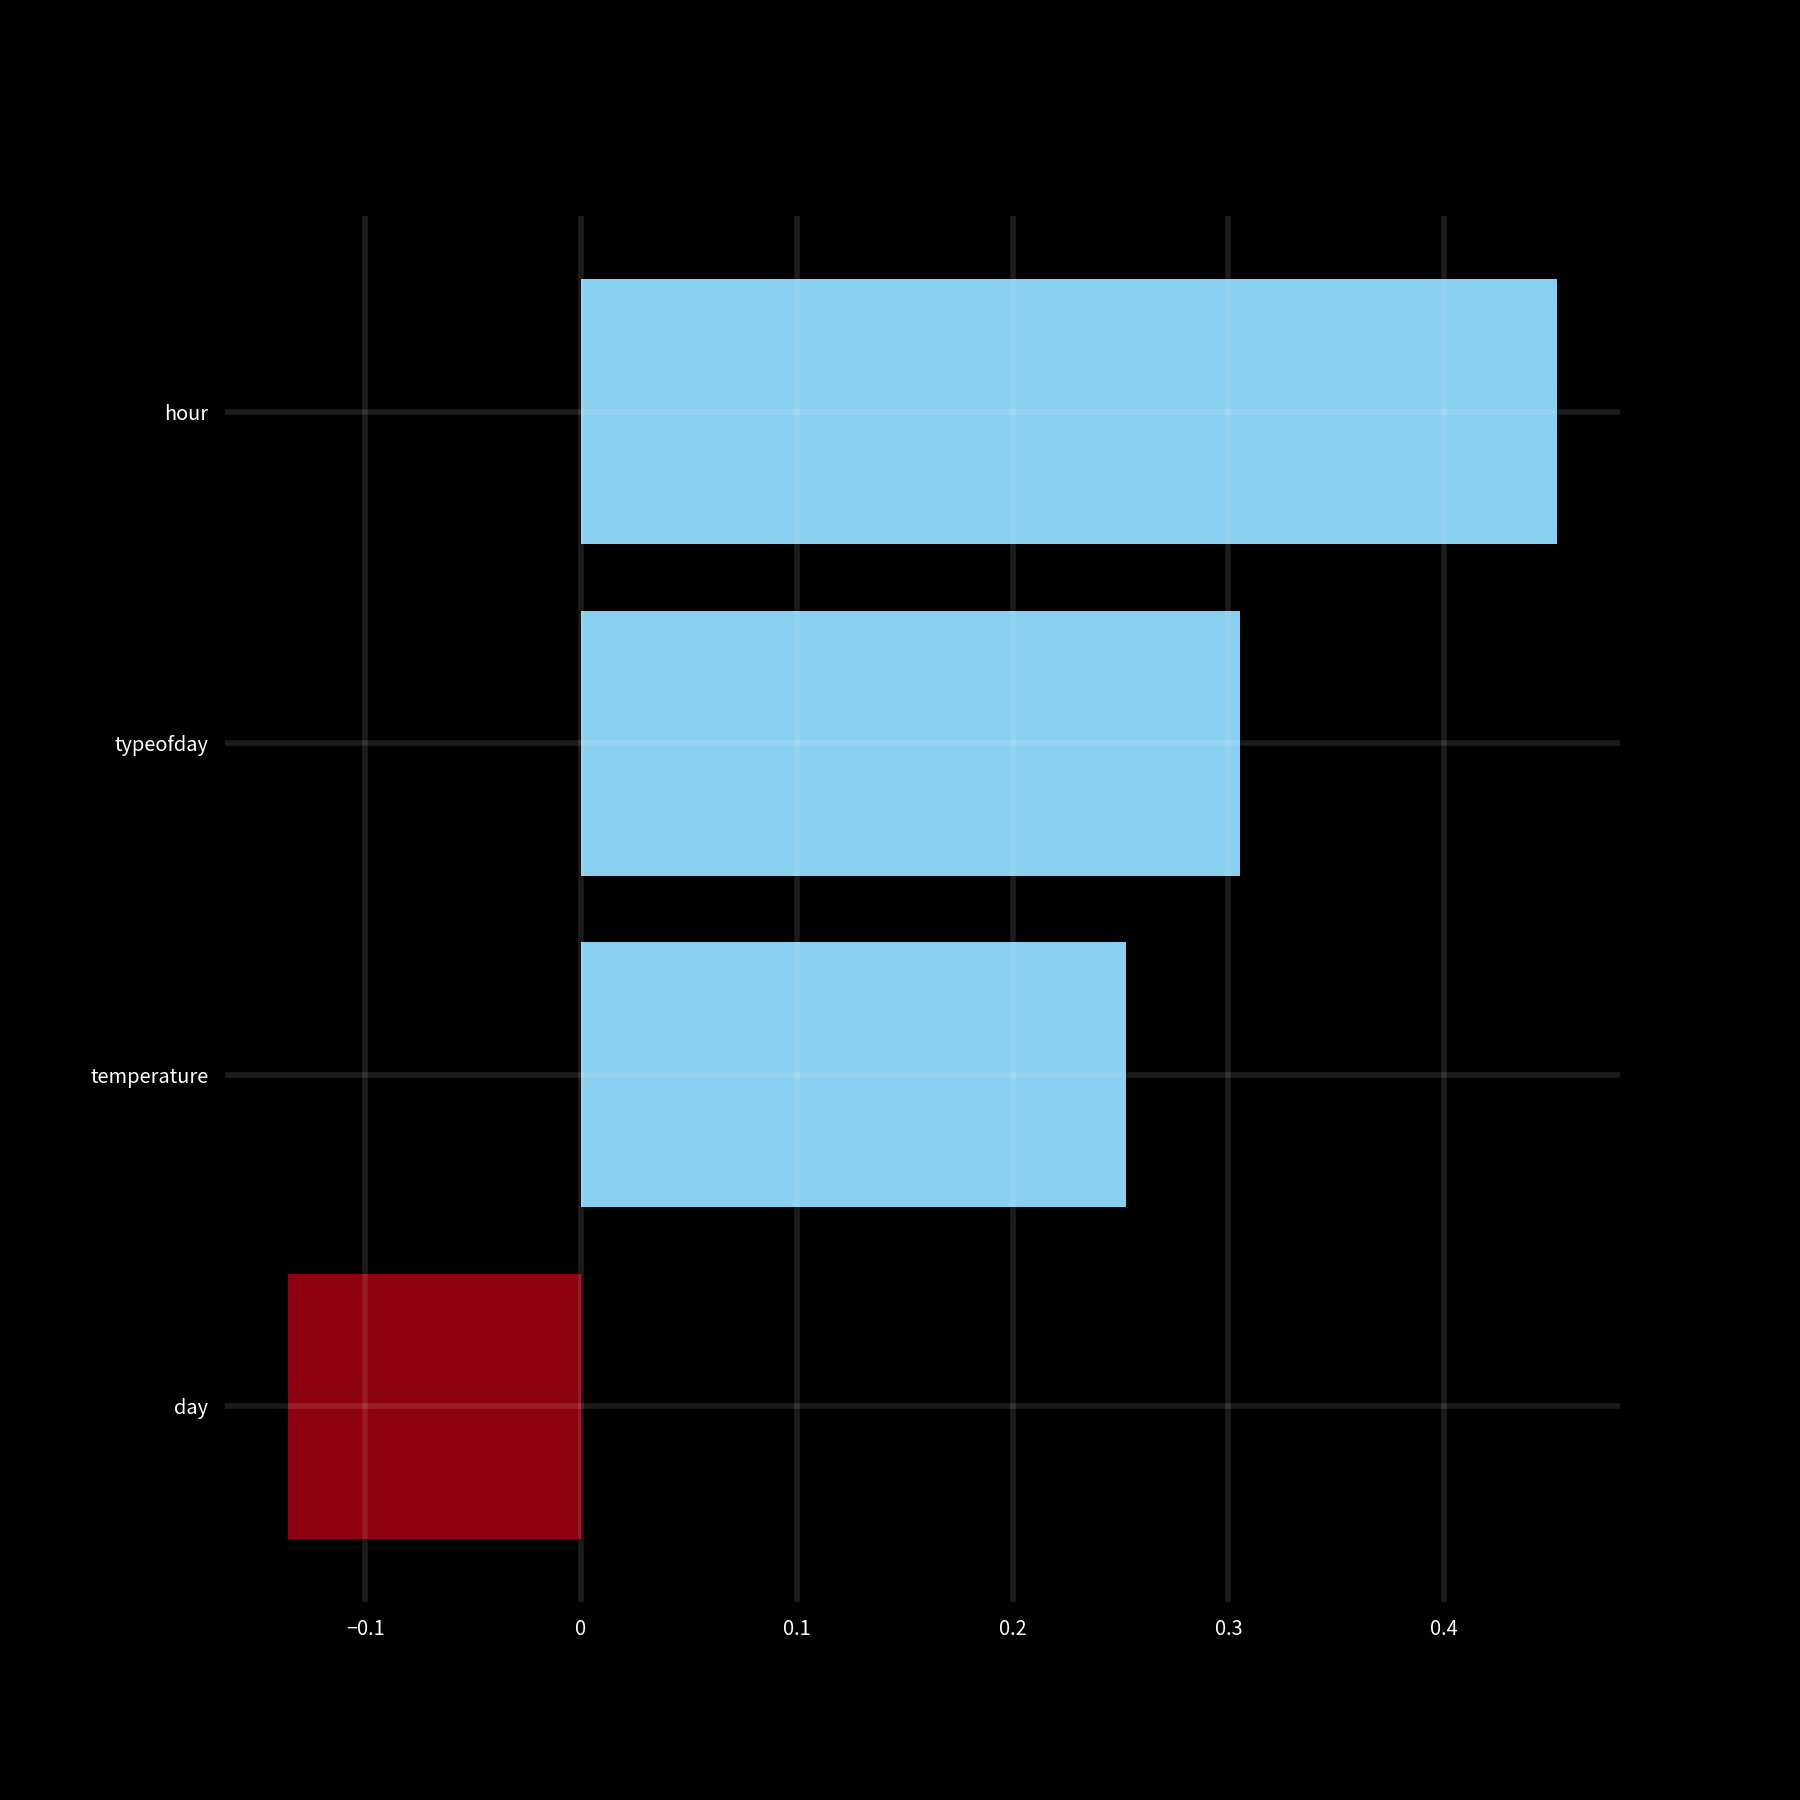

In [48]:
# compute the correlation between numerical features 

corr = df[df.columns].corr()['client'].sort_values(ascending=True).to_frame()
corr = corr.drop(corr[corr.client > 0.99].index)

# Visualization
fig, ax = plt.subplots(figsize =(9, 9))
fig.patch.set_facecolor('black')
ax.patch.set_facecolor('black')

ax.barh(corr.index, corr.client, align='center', color = np.where(corr['client'] < 0, 'crimson', '#89CFF0'))

ax.tick_params(axis='both', which='major', labelsize=8)
ax.yaxis.set_label_coords(0, 0)

ax.grid(color='white', linewidth=2)

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes spines
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'

plt.text(-0.12, 39, "Correlation", size=24, color="grey", fontweight="bold");
plt.text(0.135, 39, "of", size=24, color="grey");
plt.text(0.185, 39, "Clients nummber", size=24, color="#89CFF0", fontweight="bold");
plt.text(0.4, 39, "to", size=24, color="grey");
plt.text(0.452, 39, "Other Features", size=24, color="grey", fontweight="bold");

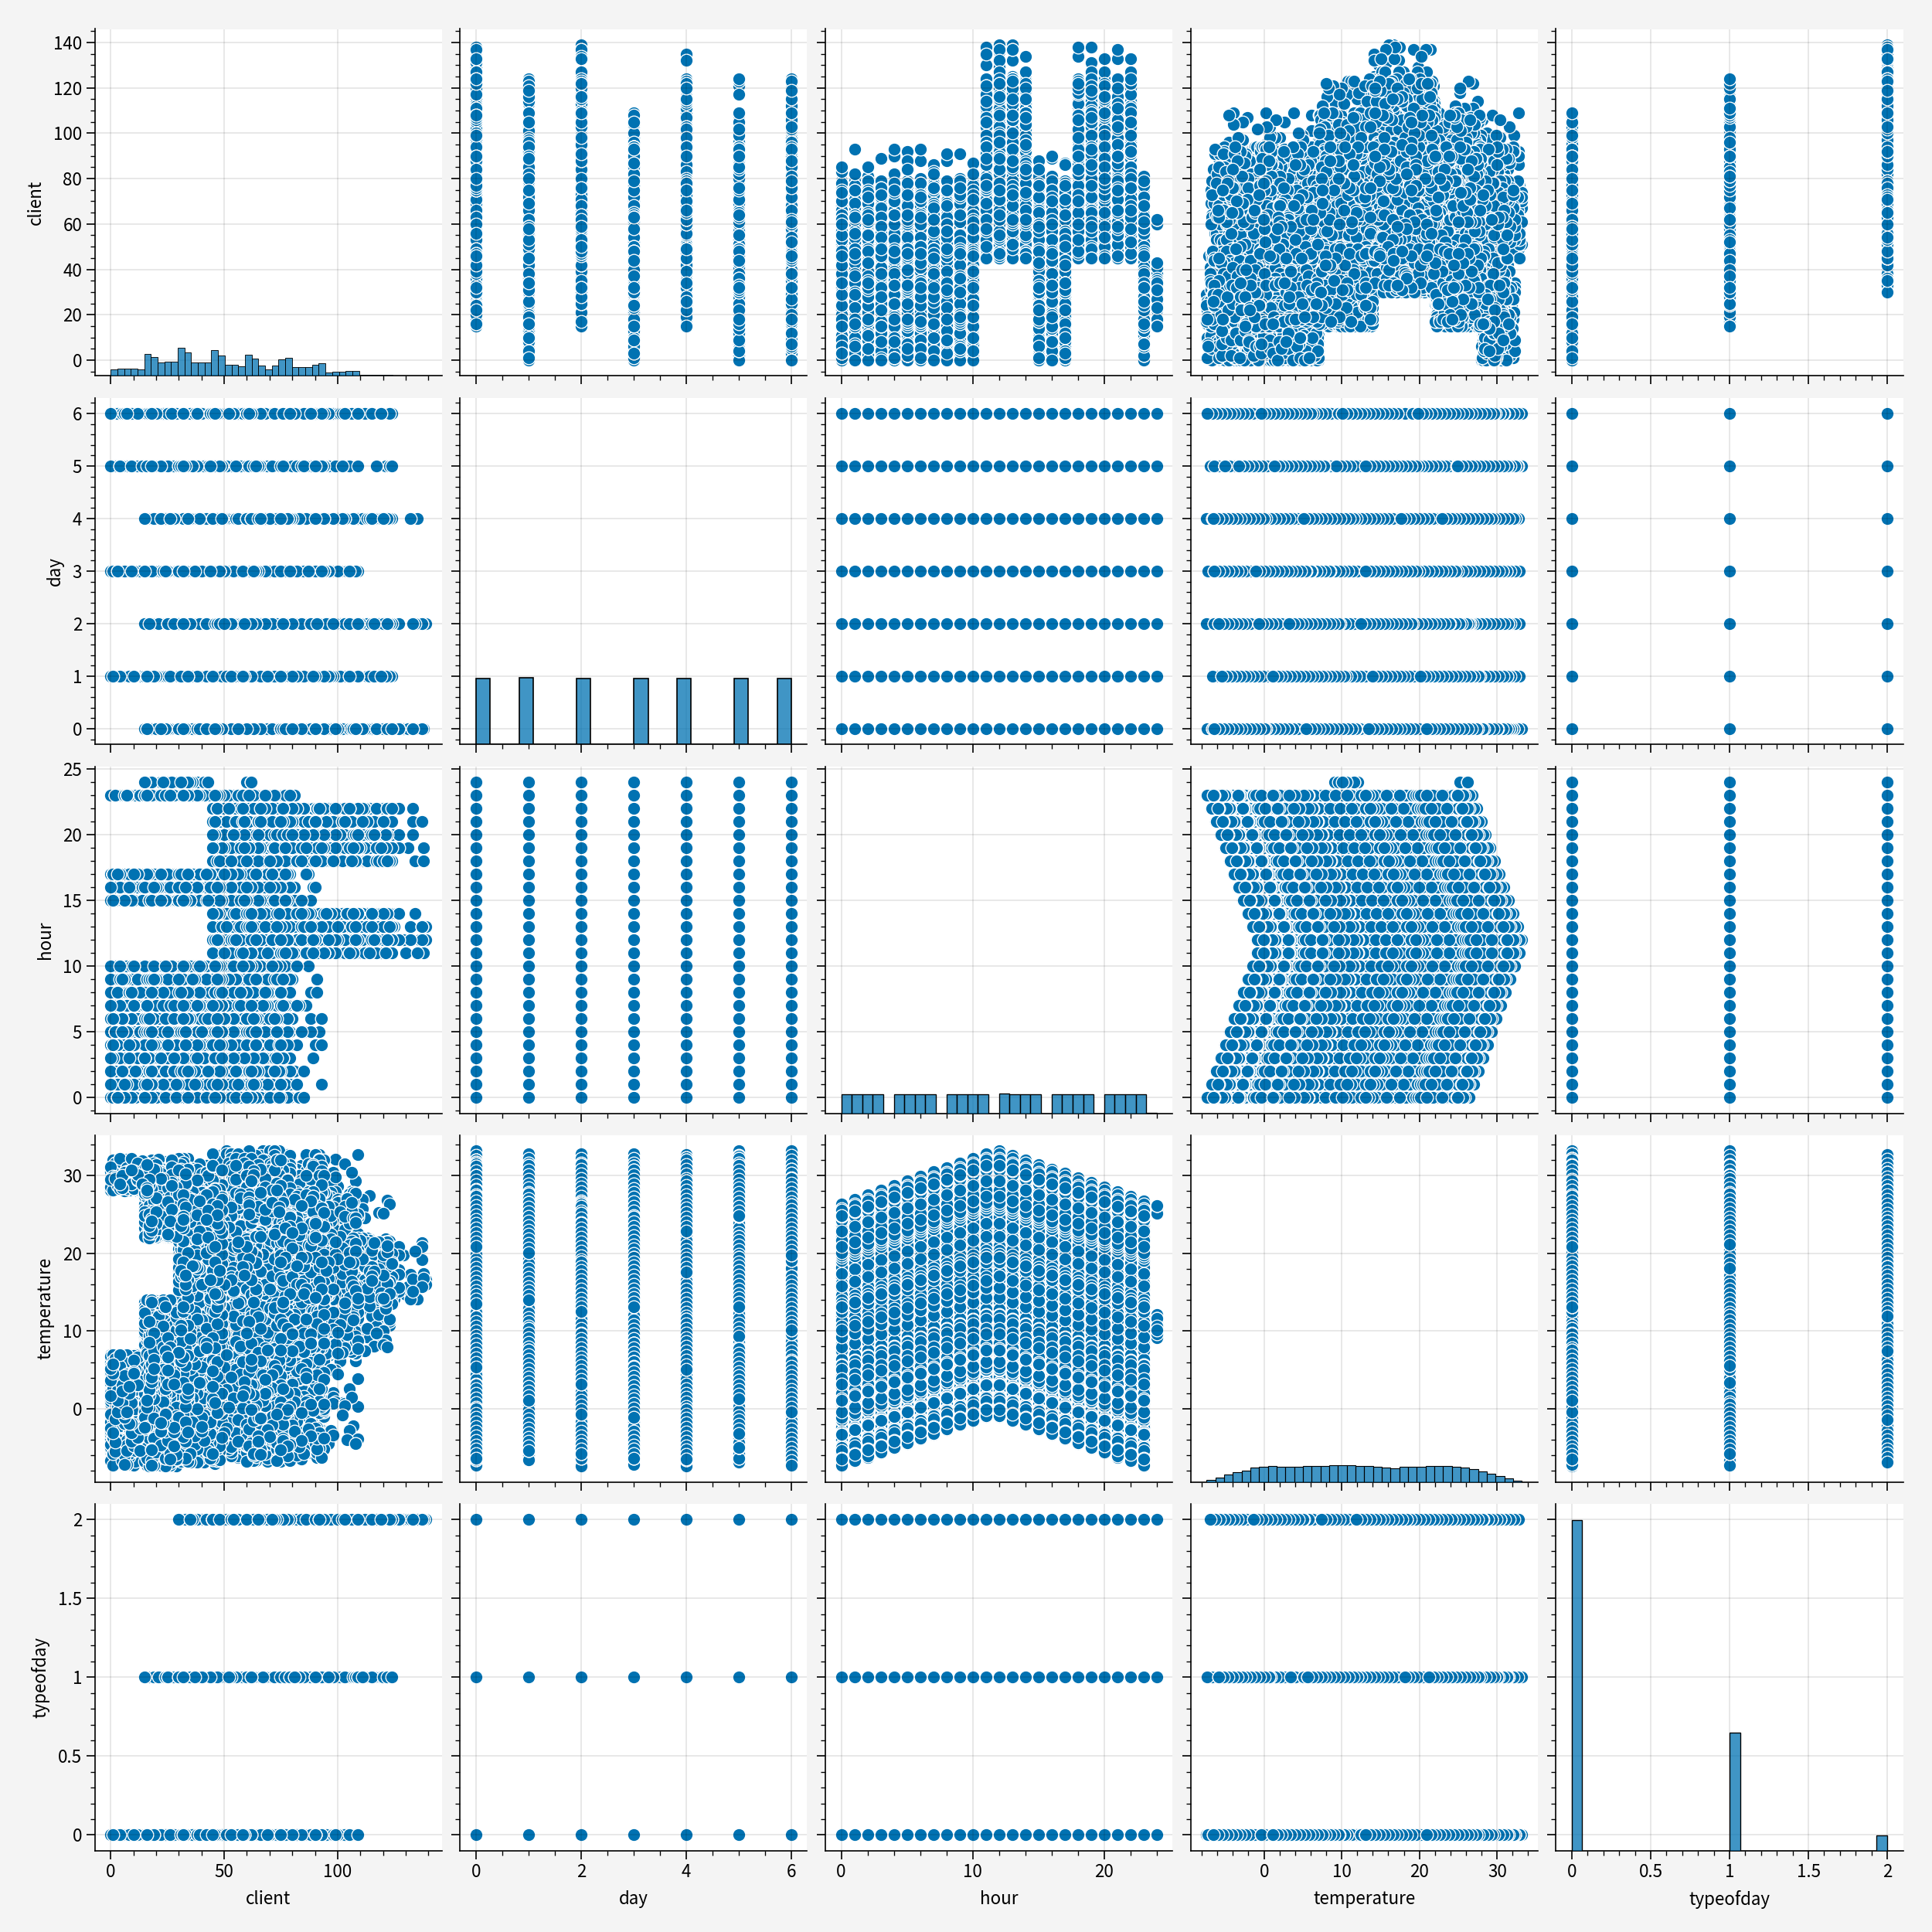

In [47]:
# pairplot top 10 correlation features + target
top_corr = corr['client'].sort_values(ascending=False).head(10).index
top_corr = top_corr.union(['client'])

sns.pairplot(df[top_corr])

## Features engineering

In [11]:
def avg_feat(cfeat, nfeat):
    new_col = '{}_Avg_{}'.format(cfeat, nfeat)
    grouped = df.groupby(cfeat)[nfeat].mean()
    df[new_col] = df[cfeat].map(dict(grouped))
    
cat_feats = ['typeofday', 'day', 'hour']
num_feats = ['client']
for cfeat in cat_feats:
    for nfeat in num_feats:
        avg_feat(cfeat, nfeat)
        
df.head(2)

typeofday  day  hour  temperature  client  typeofday_Avg_client  \
0          2    1     0     6.900000      36             77.560976   
1          2    1     1     7.483333      61             77.560976   

   day_Avg_client  hour_Avg_client  
0       44.242743        32.619094  
1       44.242743        33.312008

## Splitting in train and test set

In [12]:
from sklearn.model_selection import ShuffleSplit


In [13]:
split = ShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)
for train_index, test_index in split.split(df, df["client"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]


## Model selection

In [14]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor

X = df.drop(['client'], axis = 'columns')
y = df.client
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

model  best_score  \
0  linear_regression    0.833163   
1              lasso    0.832616   
2      decision_tree    0.912817   

                                         best_params  
0                                {'normalize': True}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'best'}

## Training model

In [15]:
dt = DecisionTreeRegressor(criterion='mse', splitter='best')

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=10)

dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.9093882482695288

In [17]:
X_train

typeofday  day  hour  temperature  typeofday_Avg_client  \
10539          0    5     1     0.483333             45.238103   
11794          0    1     8    24.166667             45.238103   
11876          0    4    18    12.316667             45.238103   
6673           0    5     7     1.483333             45.238103   
2261           0    3    20    14.433333             45.238103   
...          ...  ...   ...          ...                   ...   
9372           0    5    10    15.633333             45.238103   
7291           1    2    21    -0.633333             60.865317   
17728          0    2    20    22.250000             45.238103   
7293           1    2    23    -1.800000             60.865317   
17673          0    0    13    -0.366667             45.238103   

       day_Avg_client  hour_Avg_client  
10539       42.308773        33.312008  
11794       44.242743        33.242126  
11876       57.329702        78.725394  
6673        42.308773        33.420276  
2261        44.315940        78.511811  
...               ...              ...  
9372        42.308773        33.537402  
7291        59.457258        78.696850  
17728       59.457258        78.511811  
7293        59.457258        32.742126  
17673       60.048480        78.580709  

[21997 rows x 7 columns]

In [28]:
df.loc[df["typeofday"] == 0]["typeofday_Avg_client"].iloc[0]

45.238103448275865

## Prediction

In [31]:
def predict_client(typeofday,day,hour,temperature):    
    
    typeofday_Avg_client = df.loc[df["typeofday"] == typeofday]["typeofday_Avg_client"].iloc[0]
    day_Avg_client = df.loc[df["day"] == day]["day_Avg_client"].iloc[0]
    hour_Avg_client = df.loc[df["hour"] == hour]["hour_Avg_client"].iloc[0]
    x = np.array([0,4,16,-7.0,typeofday_Avg_client,day_Avg_client,hour_Avg_client])
    
    return dt.predict([x])[0]


predict_client(0,4,16,-7.0)

34.0

## Deep learning model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [20]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

In [21]:
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=20, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1183, in fit
    tmp_logs = self.train_function(iterator)
  File 

C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1183, in fit
    tmp_logs = self.train_function(iterator)
  File 

C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1183, in fit
    tmp_logs = self.train_function(iterator)
  File 

Standardized: nan (nan) MSE


C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\delvauxt\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1183, in fit
    tmp_logs = self.train_function(iterator)
  File 